In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import shutil
from sklearn.utils import shuffle

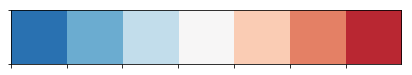

In [4]:
import seaborn as sns
sns.palplot(sns.color_palette("RdBu_r", 7))

sns.set_style("whitegrid")

# Importando base de dados

<p>Base com todos os dados do sudeste</p>

In [5]:
df = pd.read_csv('../data/sudeste.csv',low_memory=False)
print len(df)

9779168


In [6]:
df = df[df['mo'].isin([1,2,3,12])] #  somente meses do verão  DEZ a MAR
print len(df)
df.head(3)

3206856


,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmin,dewp,dmax,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
600,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-12-01 00:00:00,2007-12-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-12-01 01:00:00,2007-12-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-12-01 02:00:00,2007-12-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
region = ['Baldim','Belo Horizonte','Betim','Brumadinho','Caeté','Capim Branco','Confins', \
                       'Contagem','Esmeraldas','Florestal','Ibirité','Igarapé','Itaguara','Itatiaiuçu', \
                       'Jaboticatubas','Juatuba','Lagoa Santa','Mário Campos','Mateus Leme','Matozinhos',\
                       'Nova Lima','Nova União','Pedro Leopoldo','Raposos','Ribeirão das Neves','Rio Acima',\
                       'Rio Manso','Sabará','Santa Luzia','São Joaquim de Bicas','São José da Lapa','Sarzedo',\
                       'Taquaraçu de Minas','Vespasiano']

In [8]:
df = df[df['city'].isin(region)] #  somente região metropolitana
print len(df)
df.head(3)

83784


,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmin,dewp,dmax,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
2480736,329,BELO HOR. (PAMPULHA),854.0,-19.883945,-43.969397,A521,Belo Horizonte,MG,2006-12-01 00:00:00,2006-12-01,...,20.7,20.5,20.4,20.2,99.0,99.0,98.0,1.0,121.0,2.6
2480737,329,BELO HOR. (PAMPULHA),854.0,-19.883945,-43.969397,A521,Belo Horizonte,MG,2006-12-01 01:00:00,2006-12-01,...,20.9,20.6,20.7,20.5,98.0,99.0,98.0,1.2,146.0,2.0
2480738,329,BELO HOR. (PAMPULHA),854.0,-19.883945,-43.969397,A521,Belo Horizonte,MG,2006-12-01 02:00:00,2006-12-01,...,20.9,20.6,20.5,20.3,98.0,98.0,98.0,0.5,309.0,2.0


In [9]:
df = df.sort_values(['wsid', 'mdct'])
df = df.reset_index(drop=True)

In [10]:
df.head(4)

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmin,dewp,dmax,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,329,BELO HOR. (PAMPULHA),854.0,-19.883945,-43.969397,A521,Belo Horizonte,MG,2006-12-01 00:00:00,2006-12-01,...,20.7,20.5,20.4,20.2,99.0,99.0,98.0,1.0,121.0,2.6
1,329,BELO HOR. (PAMPULHA),854.0,-19.883945,-43.969397,A521,Belo Horizonte,MG,2006-12-01 01:00:00,2006-12-01,...,20.9,20.6,20.7,20.5,98.0,99.0,98.0,1.2,146.0,2.0
2,329,BELO HOR. (PAMPULHA),854.0,-19.883945,-43.969397,A521,Belo Horizonte,MG,2006-12-01 02:00:00,2006-12-01,...,20.9,20.6,20.5,20.3,98.0,98.0,98.0,0.5,309.0,2.0
3,329,BELO HOR. (PAMPULHA),854.0,-19.883945,-43.969397,A521,Belo Horizonte,MG,2006-12-01 03:00:00,2006-12-01,...,20.7,20.5,20.6,20.3,98.0,98.0,98.0,NaN,356.0,0.9


# Pré-processamento

<h3>Limpeza dos dados</h3>

In [11]:
# Campos não numericos e campos derivados
DES= ['wsid','wsnm','elvt','lat','lon','inme','city','prov']
INT = ['yr','mo','da','hr']
DAT = ['mdct','date']
DER = ['smax','smin','tmax','tmin','dmax','dmin','hmax','hmin']

In [12]:
# dataframe apenas com os dados continuos
dfcont = df
for f in DES + INT + DAT:    
    dfcont = dfcont.drop(f, 1)

In [13]:
dfcont = dfcont.apply(pd.to_numeric, errors='coerce')  

In [14]:
dfcont.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83784 entries, 0 to 83783
Data columns (total 17 columns):
prcp    11092 non-null float64
stp     83784 non-null float64
smax    83784 non-null float64
smin    83784 non-null float64
gbrd    48698 non-null float64
temp    83784 non-null float64
tmax    83784 non-null float64
tmin    83784 non-null float64
dewp    83784 non-null float64
dmax    83784 non-null float64
dmin    83784 non-null float64
hmdy    83784 non-null float64
hmax    83784 non-null float64
hmin    83784 non-null float64
wdsp    73682 non-null float64
wdct    83784 non-null float64
gust    78858 non-null float64
dtypes: float64(17)
memory usage: 10.9 MB


In [15]:
dfcont.describe().T

,count,mean,std,min,25%,50%,75%,max
prcp,11092.0,2.591543,5.079670,0.0,0.2,0.600,2.60000,78.400
stp,83784.0,894.517334,110.223345,0.0,883.3,916.600,925.70000,935.700
smax,83784.0,894.711599,110.471505,0.0,883.5,916.800,926.00000,935.800
smin,83784.0,894.223229,110.410145,0.0,883.0,916.300,925.40000,935.700
gbrd,48698.0,1446.597318,1219.053792,0.0,269.0,1245.801,2451.93475,5171.864
temp,83784.0,22.192565,4.509744,0.0,19.6,21.700,25.00000,36.300
tmax,83784.0,16.739437,2.824655,0.0,15.7,17.100,18.40000,23.500
tmin,83784.0,22.871639,4.757092,0.0,20.1,22.300,26.00000,37.100
dewp,83784.0,17.322818,2.861175,0.0,16.3,17.700,18.90000,24.100
dmax,83784.0,21.551041,4.260199,0.0,19.3,21.100,24.10000,34.500


<p> A variável gbbr(radiação global) apresenta massivamente números nulos e não pode ser recuperada. Vamos retirar esta variável.</p>

In [16]:
dfcont =  dfcont.drop('gbrd',1)
df = df.drop('gbrd',1)

<p>Para as precipitações nulas foi inputado 0.0 mm. Também para o vento e rajada de vento.</p>

In [17]:
CAN_BE_NULL = ['wdsp','prcp','gust']

In [18]:
for v in CAN_BE_NULL:
    df[v] = df[v].fillna(0.0)
    dfcont[v] = dfcont[v].fillna(0.0)  

<p>Vamos ver como os dados contínuos estão organizados: MÍNIMOS, MÁXIMOS, MEDIAS</p>

In [19]:
dfcont.describe().T

,count,mean,std,min,25%,50%,75%,max
prcp,83784.0,0.343089,2.046260,0.0,0.0,0.0,0.0,78.4
stp,83784.0,894.517334,110.223345,0.0,883.3,916.6,925.7,935.7
smax,83784.0,894.711599,110.471505,0.0,883.5,916.8,926.0,935.8
smin,83784.0,894.223229,110.410145,0.0,883.0,916.3,925.4,935.7
temp,83784.0,22.192565,4.509744,0.0,19.6,21.7,25.0,36.3
tmax,83784.0,16.739437,2.824655,0.0,15.7,17.1,18.4,23.5
tmin,83784.0,22.871639,4.757092,0.0,20.1,22.3,26.0,37.1
dewp,83784.0,17.322818,2.861175,0.0,16.3,17.7,18.9,24.1
dmax,83784.0,21.551041,4.260199,0.0,19.3,21.1,24.1,34.5
dmin,83784.0,16.185735,2.843179,-2.2,15.1,16.6,17.9,22.6


<p>A temperatura será inputada pela média</p>

In [20]:
MEAN = ['temp','dewp']

In [21]:
for v in MEAN:
    df[v] = df[v].fillna(value=df[v].median())
    dfcont[v] = dfcont[v].fillna(value=dfcont[v].median())

In [22]:
dfcont.describe().T

,count,mean,std,min,25%,50%,75%,max
prcp,83784.0,0.343089,2.046260,0.0,0.0,0.0,0.0,78.4
stp,83784.0,894.517334,110.223345,0.0,883.3,916.6,925.7,935.7
smax,83784.0,894.711599,110.471505,0.0,883.5,916.8,926.0,935.8
smin,83784.0,894.223229,110.410145,0.0,883.0,916.3,925.4,935.7
temp,83784.0,22.192565,4.509744,0.0,19.6,21.7,25.0,36.3
tmax,83784.0,16.739437,2.824655,0.0,15.7,17.1,18.4,23.5
tmin,83784.0,22.871639,4.757092,0.0,20.1,22.3,26.0,37.1
dewp,83784.0,17.322818,2.861175,0.0,16.3,17.7,18.9,24.1
dmax,83784.0,21.551041,4.260199,0.0,19.3,21.1,24.1,34.5
dmin,83784.0,16.185735,2.843179,-2.2,15.1,16.6,17.9,22.6


In [23]:
for v in ['tmax','tmin']:
    dfcont[v] = dfcont[v].fillna(value=dfcont['temp'])
    df[v] = df[v].fillna(value=df['temp'])
for v in ['dmax','dmin']:
    dfcont[v] = dfcont[v].fillna(value=dfcont['dewp'])
    df[v] = df[v].fillna(value=df['dewp'])
for v in ['hmax','hmin']:
    dfcont[v] = dfcont[v].fillna(value=dfcont['hmdy'])
    df[v] = df[v].fillna(value=df['hmdy'])

In [24]:
dfcont.describe().T

,count,mean,std,min,25%,50%,75%,max
prcp,83784.0,0.343089,2.046260,0.0,0.0,0.0,0.0,78.4
stp,83784.0,894.517334,110.223345,0.0,883.3,916.6,925.7,935.7
smax,83784.0,894.711599,110.471505,0.0,883.5,916.8,926.0,935.8
smin,83784.0,894.223229,110.410145,0.0,883.0,916.3,925.4,935.7
temp,83784.0,22.192565,4.509744,0.0,19.6,21.7,25.0,36.3
tmax,83784.0,16.739437,2.824655,0.0,15.7,17.1,18.4,23.5
tmin,83784.0,22.871639,4.757092,0.0,20.1,22.3,26.0,37.1
dewp,83784.0,17.322818,2.861175,0.0,16.3,17.7,18.9,24.1
dmax,83784.0,21.551041,4.260199,0.0,19.3,21.1,24.1,34.5
dmin,83784.0,16.185735,2.843179,-2.2,15.1,16.6,17.9,22.6


<h3>Derivando novas variáveis</h3>

<p>O objetivo é derivar cada variável climática contínua em uma nova variável t-1, t-2, t-3... t-n, onde n é o numeros de horas antes do momento t. Vamos primeiramente derivá-las para depois verificar quais quando massivamente as variávies estão zeradas, o que pode indicar que a estação falhou.</p>

<p>Utilizando um exemplo especifico de uma estação, depois verificamos o conjunto maior</p> 

In [25]:
dfm = df

In [26]:
len(dfm)

83784

In [27]:
#dfm.index = pd.to_datetime(dfm.mdct)
#dfm = dfm.set_index(['mdct','wsid']).unstack().swaplevel(0,1,1).sort_index(1)
#dfm.head(4)

In [28]:
CLEAN = ['wsnm','inme','city','prov','date']
REMOVE = ['yr', 'mo', 'da', 'hr']
#REMOVE = ['wsid','yr', 'mo', 'da', 'hr']
for v in CLEAN + REMOVE:
    dfm = dfm.drop(v,1)
dfm.head(5)  

,wsid,elvt,lat,lon,mdct,prcp,stp,smax,smin,temp,...,tmin,dewp,dmax,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,329,854.0,-19.883945,-43.969397,2006-12-01 00:00:00,0.0,915.4,915.4,914.0,20.7,...,20.7,20.5,20.4,20.2,99.0,99.0,98.0,1.0,121.0,2.6
1,329,854.0,-19.883945,-43.969397,2006-12-01 01:00:00,0.0,916.0,916.0,915.4,20.9,...,20.9,20.6,20.7,20.5,98.0,99.0,98.0,1.2,146.0,2.0
2,329,854.0,-19.883945,-43.969397,2006-12-01 02:00:00,0.4,916.0,916.2,916.0,20.6,...,20.9,20.6,20.5,20.3,98.0,98.0,98.0,0.5,309.0,2.0
3,329,854.0,-19.883945,-43.969397,2006-12-01 03:00:00,1.8,915.1,916.0,915.1,20.7,...,20.7,20.5,20.6,20.3,98.0,98.0,98.0,0.0,356.0,0.9
4,329,854.0,-19.883945,-43.969397,2006-12-01 04:00:00,12.4,914.4,915.2,914.4,20.4,...,20.7,20.4,20.4,20.1,98.0,98.0,98.0,2.3,83.0,3.8


In [29]:
ws = dfm['wsid'].groupby(dfm['wsid']).count()
ws = list(ws.keys())
print ws

[329, 343, 363, 370]


In [30]:
#dfm = dfm[dfm['wsid'].isin([178, 329])]
#len(dfm)

In [31]:
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    
    if not lag:
        return df
    
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
  
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
        
    return df

In [32]:
NON_DER = ['wsid','elvt','lat', 'lon', 'yr', 'mo', 'da', 'hr']

dfr = df_derived_by_shift(dfm,6,NON_DER)

In [33]:
dfr.head(4)

var = []
cld = list(dfr.columns)
for x in cld:
    if len(x.split('_')) >= 2:
        var.append((x.split('_')[0], x.split('_')[1]))

In [34]:
cols = {}
for v,i in var:
    x = '{}_{}'.format(v, i)
    if int(i) not in cols:
        cols[int(i)] = [x]
    else:
        cols[int(i)].append(x)
#print cols

In [35]:
#ws = [178,329]
#for w in ws:
#    for k,v in cols.items():
#        idx = dfr.loc[dfr['wsid']==w].index
#        dfr.loc[dfr.loc[idx,v].index[int(k)],k] = np.nan

In [36]:
for w in ws:
    x = dfr.loc[dfr['wsid'].isin([w])].iloc[0:6].index
    dfr.drop(dfr.index[x], inplace=True)

In [37]:
#x = dfr.loc[dfr['wsid'].isin([329])].iloc[0:6].index
#dfr.drop(dfr.index[x],  inplace=True)
#dfr.drop(x)
#dfr.loc[x]

In [257]:
dfm = dfr

In [258]:
REMOVE = [u'prcp_1', u'prcp_2', u'prcp_3', u'prcp_4', u'prcp_5', u'prcp_6']
for v in REMOVE:
    if v in list(dfm.columns):
        dfm = dfm.drop(v,1)

In [259]:
list(dfm.columns)

['wsid',
 'elvt',
 'lat',
 'lon',
 'mdct',
 'prcp',
 'stp',
 'smax',
 'smin',
 'temp',
 'tmax',
 'tmin',
 'dewp',
 'dmax',
 'dmin',
 'hmdy',
 'hmax',
 'hmin',
 'wdsp',
 'wdct',
 'gust',
 'wdct_1',
 'wdct_2',
 'wdct_3',
 'wdct_4',
 'wdct_5',
 'wdct_6',
 'tmin_1',
 'tmin_2',
 'tmin_3',
 'tmin_4',
 'tmin_5',
 'tmin_6',
 'hmax_1',
 'hmax_2',
 'hmax_3',
 'hmax_4',
 'hmax_5',
 'hmax_6',
 'temp_1',
 'temp_2',
 'temp_3',
 'temp_4',
 'temp_5',
 'temp_6',
 'hmin_1',
 'hmin_2',
 'hmin_3',
 'hmin_4',
 'hmin_5',
 'hmin_6',
 'gust_1',
 'gust_2',
 'gust_3',
 'gust_4',
 'gust_5',
 'gust_6',
 'tmax_1',
 'tmax_2',
 'tmax_3',
 'tmax_4',
 'tmax_5',
 'tmax_6',
 'smax_1',
 'smax_2',
 'smax_3',
 'smax_4',
 'smax_5',
 'smax_6',
 'hmdy_1',
 'hmdy_2',
 'hmdy_3',
 'hmdy_4',
 'hmdy_5',
 'hmdy_6',
 'mdct_1',
 'mdct_2',
 'mdct_3',
 'mdct_4',
 'mdct_5',
 'mdct_6',
 'dewp_1',
 'dewp_2',
 'dewp_3',
 'dewp_4',
 'dewp_5',
 'dewp_6',
 'wdsp_1',
 'wdsp_2',
 'wdsp_3',
 'wdsp_4',
 'wdsp_5',
 'wdsp_6',
 'stp_1',
 'stp_2',
 '

In [260]:
dfm = dfm.dropna()  

In [261]:
dfm = dfm.reset_index(drop=True)

In [262]:
dfm.head(5)

,wsid,elvt,lat,lon,mdct,prcp,stp,smax,smin,temp,...,dmin_3,dmin_4,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6
0,329,854.0,-19.883945,-43.969397,2006-12-01 06:00:00,0.0,913.5,913.8,913.4,20.8,...,20.3,20.3,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4
1,329,854.0,-19.883945,-43.969397,2006-12-01 07:00:00,0.0,913.4,913.6,913.4,20.2,...,20.1,20.3,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7
2,329,854.0,-19.883945,-43.969397,2006-12-01 08:00:00,0.0,914.2,914.2,913.4,20.1,...,19.5,20.1,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5
3,329,854.0,-19.883945,-43.969397,2006-12-01 09:00:00,0.0,915.0,915.0,914.2,20.7,...,19.0,19.5,20.1,20.3,19.9,20.2,20.1,20.2,20.4,20.6
4,329,854.0,-19.883945,-43.969397,2006-12-01 10:00:00,0.0,915.7,915.7,915.0,21.3,...,19.1,19.0,19.5,20.1,19.9,19.9,20.2,20.1,20.2,20.4


In [263]:
#como esta rede é especifica para a BH, vamos remover elvt, lat, lon
REMOVE = ['elvt','lat', 'lon']
for v in REMOVE:
    dfm = dfm.drop(v,1)

In [264]:
x = dfm[dfm['wsid'].isin([329])]
x.head(4)

,wsid,mdct,prcp,stp,smax,smin,temp,tmax,tmin,dewp,...,dmin_3,dmin_4,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6
0,329,2006-12-01 06:00:00,0.0,913.5,913.8,913.4,20.8,19.0,21.0,19.6,...,20.3,20.3,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4
1,329,2006-12-01 07:00:00,0.0,913.4,913.6,913.4,20.2,19.3,20.8,19.7,...,20.1,20.3,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7
2,329,2006-12-01 08:00:00,0.0,914.2,914.2,913.4,20.1,19.4,20.6,19.4,...,19.5,20.1,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5
3,329,2006-12-01 09:00:00,0.0,915.0,915.0,914.2,20.7,19.4,20.7,19.5,...,19.0,19.5,20.1,20.3,19.9,20.2,20.1,20.2,20.4,20.6


In [265]:
dfm.head(5)

,wsid,mdct,prcp,stp,smax,smin,temp,tmax,tmin,dewp,...,dmin_3,dmin_4,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6
0,329,2006-12-01 06:00:00,0.0,913.5,913.8,913.4,20.8,19.0,21.0,19.6,...,20.3,20.3,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4
1,329,2006-12-01 07:00:00,0.0,913.4,913.6,913.4,20.2,19.3,20.8,19.7,...,20.1,20.3,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7
2,329,2006-12-01 08:00:00,0.0,914.2,914.2,913.4,20.1,19.4,20.6,19.4,...,19.5,20.1,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5
3,329,2006-12-01 09:00:00,0.0,915.0,915.0,914.2,20.7,19.4,20.7,19.5,...,19.0,19.5,20.1,20.3,19.9,20.2,20.1,20.2,20.4,20.6
4,329,2006-12-01 10:00:00,0.0,915.7,915.7,915.0,21.3,19.3,21.3,19.3,...,19.1,19.0,19.5,20.1,19.9,19.9,20.2,20.1,20.2,20.4


In [266]:
CAN_BE_NULL

['wdsp', 'prcp', 'gust']

<h3>Preparando a base</h3>

<p>Removendo registros que não pode ser nulos e prejudicariam o treinamento</p>

In [267]:
cols = list(dfm.columns)

COLS_BE_NULL = ['prcp','wdsp','wdsp_1','wdsp_2','wdsp_3','wdsp_4','wdsp_5','wdsp_6' \
                'gust','gust_1','gust_2','gust_3','gust_4','gust_5','gust_6']
for v in COLS_BE_NULL:
    if v in cols:
        cols.remove(v)

In [268]:
dfm[cols] = dfm[cols].replace({0.0:np.nan})
dfm.head(5)

,wsid,mdct,prcp,stp,smax,smin,temp,tmax,tmin,dewp,...,dmin_3,dmin_4,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6
0,329,2006-12-01 06:00:00,0.0,913.5,913.8,913.4,20.8,19.0,21.0,19.6,...,20.3,20.3,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4
1,329,2006-12-01 07:00:00,0.0,913.4,913.6,913.4,20.2,19.3,20.8,19.7,...,20.1,20.3,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7
2,329,2006-12-01 08:00:00,0.0,914.2,914.2,913.4,20.1,19.4,20.6,19.4,...,19.5,20.1,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5
3,329,2006-12-01 09:00:00,0.0,915.0,915.0,914.2,20.7,19.4,20.7,19.5,...,19.0,19.5,20.1,20.3,19.9,20.2,20.1,20.2,20.4,20.6
4,329,2006-12-01 10:00:00,0.0,915.7,915.7,915.0,21.3,19.3,21.3,19.3,...,19.1,19.0,19.5,20.1,19.9,19.9,20.2,20.1,20.2,20.4


In [269]:
dfm = dfm.dropna()

In [270]:
len(dfm)

67144

In [271]:
dfm.head(5)

,wsid,mdct,prcp,stp,smax,smin,temp,tmax,tmin,dewp,...,dmin_3,dmin_4,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6
0,329,2006-12-01 06:00:00,0.0,913.5,913.8,913.4,20.8,19.0,21.0,19.6,...,20.3,20.3,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4
1,329,2006-12-01 07:00:00,0.0,913.4,913.6,913.4,20.2,19.3,20.8,19.7,...,20.1,20.3,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7
2,329,2006-12-01 08:00:00,0.0,914.2,914.2,913.4,20.1,19.4,20.6,19.4,...,19.5,20.1,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5
4,329,2006-12-01 10:00:00,0.0,915.7,915.7,915.0,21.3,19.3,21.3,19.3,...,19.1,19.0,19.5,20.1,19.9,19.9,20.2,20.1,20.2,20.4
5,329,2006-12-01 11:00:00,0.0,916.2,916.3,915.7,21.9,19.1,21.9,19.6,...,19.1,19.1,19.0,19.5,20.6,19.9,19.9,20.2,20.1,20.2


In [272]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67144 entries, 0 to 83759
Columns: 114 entries, wsid to dmax_6
dtypes: float64(106), int64(1), object(7)
memory usage: 58.9+ MB


In [273]:
dfm = dfm.drop('wsid',1)
dfm = dfm.drop('mdct',1)

In [274]:
dfm.head(4)

,prcp,stp,smax,smin,temp,tmax,tmin,dewp,dmax,dmin,...,dmin_3,dmin_4,dmin_5,dmin_6,dmax_1,dmax_2,dmax_3,dmax_4,dmax_5,dmax_6
0,0.0,913.5,913.8,913.4,20.8,19.0,21.0,19.6,20.1,19.0,...,20.3,20.3,20.5,20.2,20.2,20.4,20.6,20.5,20.7,20.4
1,0.0,913.4,913.6,913.4,20.2,19.3,20.8,19.7,20.2,19.1,...,20.1,20.3,20.3,20.5,20.1,20.2,20.4,20.6,20.5,20.7
2,0.0,914.2,914.2,913.4,20.1,19.4,20.6,19.4,19.9,19.1,...,19.5,20.1,20.3,20.3,20.2,20.1,20.2,20.4,20.6,20.5
4,0.0,915.7,915.7,915.0,21.3,19.3,21.3,19.3,20.6,18.8,...,19.1,19.0,19.5,20.1,19.9,19.9,20.2,20.1,20.2,20.4


In [275]:
REMOVE = [u'mdct',u'mdct_1', u'mdct_2', u'mdct_3', u'mdct_4', u'mdct_5', u'mdct_6']
for v in REMOVE:
    if v in list(dfm.columns):
        dfm = dfm.drop(v,1)

In [276]:
dfm.columns

Index([u'prcp', u'stp', u'smax', u'smin', u'temp', u'tmax', u'tmin', u'dewp',
       u'dmax', u'dmin',
       ...
       u'dmin_3', u'dmin_4', u'dmin_5', u'dmin_6', u'dmax_1', u'dmax_2',
       u'dmax_3', u'dmax_4', u'dmax_5', u'dmax_6'],
      dtype='object', length=106)

<h2>Mineiração dos dados</h2>

<h3>Rede neural</h3>

In [277]:
import tensorflow as tf  
from sklearn.metrics import explained_variance_score, mean_absolute_error,  median_absolute_error
from sklearn.model_selection import train_test_split 

In [278]:
target = 'prcp'

In [345]:
X =  dfm[[col for col in dfm.columns]]
y = dfm[target]

<p>Separando o conjunto de treinamento e validação (metade dos 10% separados para validação)</p>

In [341]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.1, random_state=12) 
print len(X_train)
print len(X_tmp)

60429
6715


<p>Separando o conjunto de testes</p>

In [342]:
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.2)

In [343]:
X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))  

Training instances   60429, Training features   106
Validation instances 1343, Validation features 106
Testing instances    5372, Testing features    106


In [399]:
# Zarate instructions
st_units = (X_train.shape[1] * 2) + 1
sd_units = X_train.shape[1] 
#activation_fn = tf.sigmoid
batch_size = 1000
up = int(len(X_train)/batch_size)

In [400]:
Z = X.copy()
Z.pop(target)
feature_cols = [tf.feature_column.numeric_column(col) for col in Z.columns] 

In [403]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols
                                      ,hidden_units=[st_units,sd_units]
                                      #,activation_fn=activation_fn
                                      ,model_dir='/tmp/tf_wx_model-22')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10d4f4dd0>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/tmp/tf_wx_model-22', '_save_summary_steps': 100}


In [404]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=batch_size):      
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [405]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(return_indices=True)

In [406]:
def balancear(_X, _y):
    
    def f(x):
        if x['prcp'] == 0.0: 
            return 0
        else:        
            return 1
        
    #Balancear considerando apenas com chuva e sem chuva.    
    _X['type'] = _X.apply(f,axis=1) 
    
    _X_resampled, _y_resampled, idx_resampled = under.fit_sample(_X, _X['type'])
    
    _X = pd.DataFrame(_X_resampled, columns = _X.columns)
    _y = pd.DataFrame(_y_resampled, columns =['type'])
    
    _y = _X['prcp']
    
    _X = _X.drop('type',1)
    _X = _X.drop('prcp',1)
    
    return _X,_y

In [407]:
#print len(X_train), len(y_train)

In [408]:
#A, b = balancear(X_train.copy(), y_train.copy())

In [409]:
#import collections, numpy
#collections.Counter(b)

In [410]:
#np.where(b==78.4)

In [411]:
#A.loc[8063:8063]

In [412]:
#xxx = X_train[X_train['prcp']==78.4]
#xxx

In [413]:
evaluations = []  
STEPS = 200  

for i in range(1, up):
    
    A, b = balancear(X_train.copy(), y_train.copy())
    
    print ('treinando agora...')
    
    regressor.train(
        input_fn=wx_input_fn(A
                            ,b)
        , steps=STEPS)
    
    evaluations.append(
        regressor.evaluate(input_fn=wx_input_fn(X_val
                                                ,y_val
                                                ,num_epochs=1
                                                ,shuffle=False)))

treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:loss = 1068377.9, step = 1
INFO:tensorflow:global_step/sec: 8.93984
INFO:tensorflow:loss = 67405.78, step = 101 (11.187 sec)
INFO:tensorflow:Saving checkpoints for 200 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:Loss for final step: 55720.203.
INFO:tensorflow:Starting evaluation at 2018-03-21-05:02:27
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-200
INFO:tensorflow:Finished evaluation at 2018-03-21-05:02:28
INFO:tensorflow:Saving dict for global step 200: average_loss = 24.277292, global_step = 200, loss = 16302.202
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-200
INFO:tensorflow:Saving checkpoints for 201 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:loss = 55026.4, step = 201
INFO:tensorflow:globa

INFO:tensorflow:loss = 1699.3848, step = 2101 (11.216 sec)
INFO:tensorflow:Saving checkpoints for 2200 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:Loss for final step: 2396.3564.
INFO:tensorflow:Starting evaluation at 2018-03-21-05:09:13
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-2200
INFO:tensorflow:Finished evaluation at 2018-03-21-05:09:15
INFO:tensorflow:Saving dict for global step 2200: average_loss = 7.1779356, global_step = 2200, loss = 4819.984
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-2200
INFO:tensorflow:Saving checkpoints for 2201 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:loss = 27706.605, step = 2201
INFO:tensorflow:global_step/sec: 8.74307
INFO:tensorflow:loss = 24485.123, step = 2301 (11.444 sec)
INFO:tensorflow:Saving checkpoints for 2400 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:Loss for final step: 30289.473.
INFO:te

INFO:tensorflow:Starting evaluation at 2018-03-21-05:16:09
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-4200
INFO:tensorflow:Finished evaluation at 2018-03-21-05:16:11
INFO:tensorflow:Saving dict for global step 4200: average_loss = 7.5503564, global_step = 4200, loss = 5070.0645
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-4200
INFO:tensorflow:Saving checkpoints for 4201 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:loss = 28897.113, step = 4201
INFO:tensorflow:global_step/sec: 8.58095
INFO:tensorflow:loss = 30743.773, step = 4301 (11.654 sec)
INFO:tensorflow:Saving checkpoints for 4400 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:Loss for final step: 32667.217.
INFO:tensorflow:Starting evaluation at 2018-03-21-05:16:54
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-4400
INFO:tensorflow:Finished evaluation at 2018-03-21-05:16:5

INFO:tensorflow:Saving dict for global step 6200: average_loss = 7.8184733, global_step = 6200, loss = 5250.105
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-6200
INFO:tensorflow:Saving checkpoints for 6201 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:loss = 19823.102, step = 6201
INFO:tensorflow:global_step/sec: 8.04494
INFO:tensorflow:loss = 18353.55, step = 6301 (12.439 sec)
INFO:tensorflow:Saving checkpoints for 6400 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:Loss for final step: 29608.275.
INFO:tensorflow:Starting evaluation at 2018-03-21-05:24:49
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-6400
INFO:tensorflow:Finished evaluation at 2018-03-21-05:24:51
INFO:tensorflow:Saving dict for global step 6400: average_loss = 10.663932, global_step = 6400, loss = 7160.83
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restor

INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-8200
INFO:tensorflow:Saving checkpoints for 8201 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:loss = 24037.172, step = 8201
INFO:tensorflow:global_step/sec: 8.20067
INFO:tensorflow:loss = 33365.57, step = 8301 (12.196 sec)
INFO:tensorflow:Saving checkpoints for 8400 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:Loss for final step: 10426.037.
INFO:tensorflow:Starting evaluation at 2018-03-21-05:32:28
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-8400
INFO:tensorflow:Finished evaluation at 2018-03-21-05:32:29
INFO:tensorflow:Saving dict for global step 8400: average_loss = 6.2548065, global_step = 8400, loss = 4200.1025
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-8400
INFO:tensorflow:Saving checkpoints for 8401 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:loss = 32535.062, st

INFO:tensorflow:loss = 19750.02, step = 10201
INFO:tensorflow:global_step/sec: 9.14972
INFO:tensorflow:loss = 21207.502, step = 10301 (10.930 sec)
INFO:tensorflow:Saving checkpoints for 10400 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:Loss for final step: 25248.912.
INFO:tensorflow:Starting evaluation at 2018-03-21-05:39:26
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-10400
INFO:tensorflow:Finished evaluation at 2018-03-21-05:39:28
INFO:tensorflow:Saving dict for global step 10400: average_loss = 9.772426, global_step = 10400, loss = 6562.1836
treinando agora...
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-10400
INFO:tensorflow:Saving checkpoints for 10401 into /tmp/tf_wx_model-22/model.ckpt.
INFO:tensorflow:loss = 5948.55, step = 10401
INFO:tensorflow:global_step/sec: 9.18302
INFO:tensorflow:loss = 1076.7039, step = 10501 (10.891 sec)
INFO:tensorflow:Saving checkpoints for 106

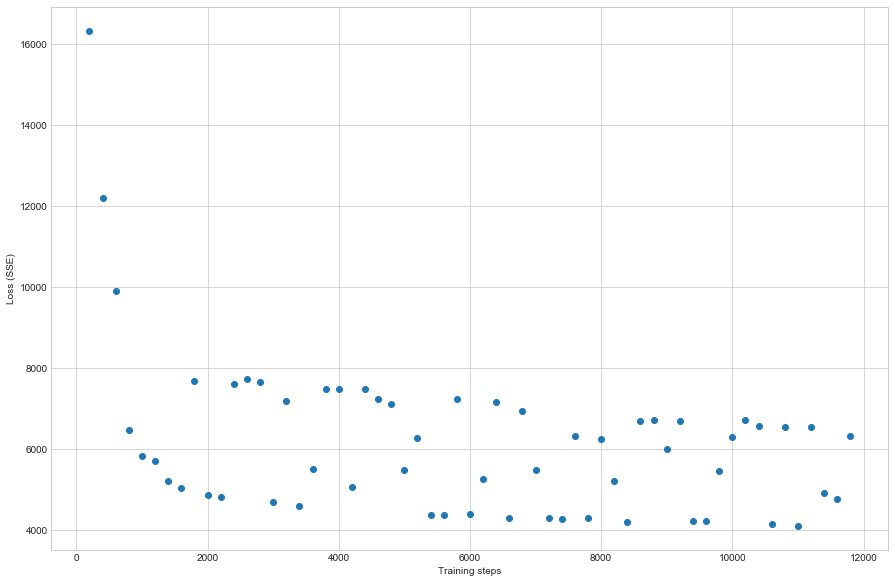

In [414]:
import matplotlib.pyplot as plt  
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 10]

loss_values = [ev['loss'] for ev in evaluations]  
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)  
plt.xlabel('Training steps')  
plt.ylabel('Loss (SSE)')  
plt.show()  

In [415]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,  
                                              num_epochs=1,
                                              shuffle=False))

predictions = np.array([p['predictions'][0] for p in pred])

INFO:tensorflow:Restoring parameters from /tmp/tf_wx_model-22/model.ckpt-11800


In [416]:

print("The Explained Variance: %.2f" % explained_variance_score(  
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f mm " % mean_absolute_error(  
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f mm" % median_absolute_error(  
                                            y_test, predictions))

The Explained Variance: -0.13
The Mean Absolute Error: 2.27 mm 
The Median Absolute Error: 2.10 mm


In [417]:
predictions

array([2.2568934, 1.4232295, 5.2015805, ..., 1.9520686, 2.053448 ,
       2.077984 ], dtype=float32)

In [418]:
predictions.size

5372

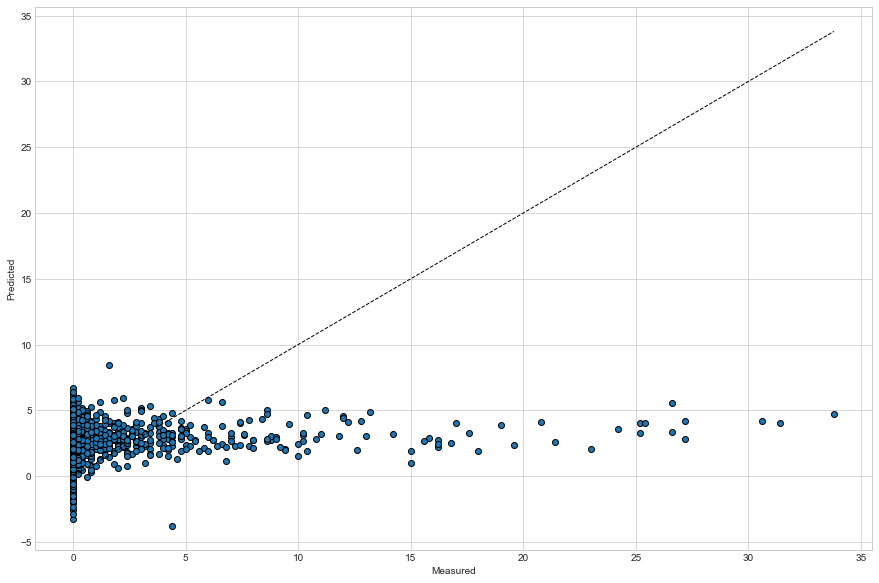

In [419]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()